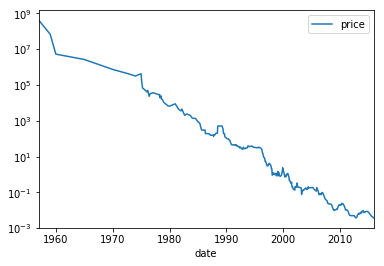

In [20]:
import pandas as pd

ram_df = pd.read_csv("../introduction_to_ml_with_python/data/ram_price.csv")
ram_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ram_df.plot('date', 'price', logy=True)


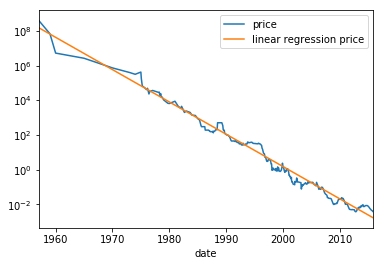

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

data_train = ram_df[ram_df.date < 2000]
data_test = ram_df[ram_df.date >= 2000]

X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_df.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_lr = np.exp(pred_lr)

ram_df['linear regression price'] = price_lr

ram_df.plot('date', ['price','linear regression price'], logy=True)